# Importing necessary Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lime.lime_tabular import LimeTabularExplainer

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Load the dataset

In [2]:
file_path = 'Crop_recommendation.csv'
df = pd.read_csv(file_path)

Dataset link:https://www.kaggle.com/datasets/cloudymts/dataset-of-crop-recommendation

N (Nitrogen):

Represents the nitrogen content in the soil.
Essential for plant growth as it is a critical component of chlorophyll, amino acids, and proteins.
Higher or lower levels directly affect plant health and yield.

P (Phosphorus):

Indicates the phosphorus content in the soil.
Important for root development, flower and fruit production, and energy transfer in plants.
Deficiency can result in poor growth and delayed maturity.

K (Potassium):

Represents the potassium content in the soil.
Enhances the plant’s ability to resist diseases, strengthens root systems, and improves water regulation.
Adequate potassium is vital for the quality of produce.

Temperature:

Refers to the ambient temperature in the environment.
Measured in degrees (Celsius or Fahrenheit) and significantly impacts crop growth.
Different crops have specific optimal temperature ranges for growth.

Humidity:

Denotes the moisture content in the air, typically expressed as a percentage.
High or low humidity levels can influence transpiration, pest outbreaks, and plant diseases.

pH:

Represents the soil’s pH level (scale of 0 to 14, with 7 being neutral).
Indicates the acidity or alkalinity of the soil, crucial for nutrient availability.
Most crops thrive in a pH range of 6.0 to 7.5, but some prefer more acidic or alkaline conditions.

Rainfall:

Indicates the amount of rainfall (likely measured in millimeters or inches).
Affects soil moisture, irrigation needs, and crop growth cycles.
Excessive or insufficient rainfall can lead to crop stress or failure.

Label:

The target or output variable.
Likely represents the crop type or suitability based on the above features.
Used for classification tasks in predictive modeling, recommending the best crops based on environmental and soil conditions.

# Exploratory Data Analysis(EDA)

In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [5]:
# Descriptive statistics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [6]:
# Descriptive statistics
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [7]:
# Descriptive statistics
df.size

17600

In [8]:
# Descriptive statistics
df.shape

(2200, 8)

In [9]:
# Descriptive statistics
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [10]:
# Check for null values
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [11]:
# Check for duplicates
duplicates = df.duplicated().sum()
duplicates

np.int64(0)

Class Distribution:
label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64


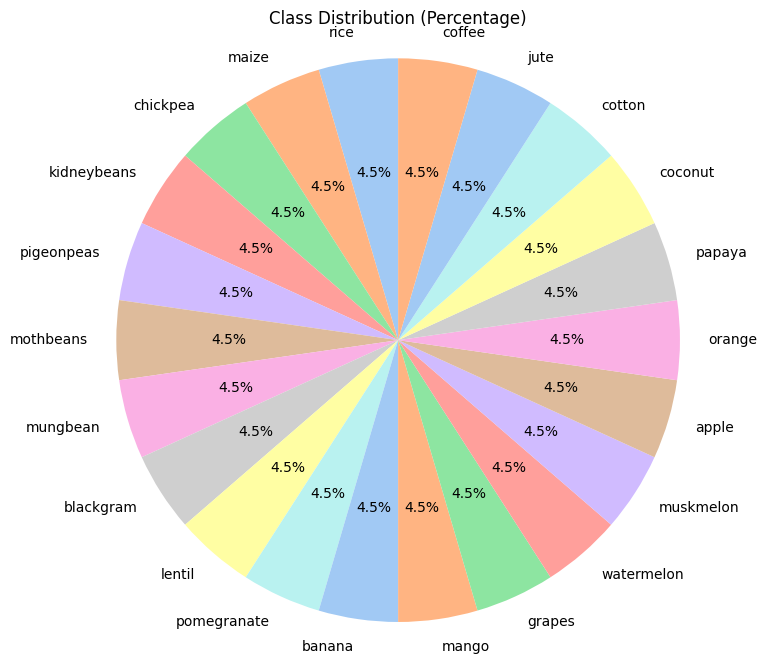

In [12]:
# Categorical Data Analysis

# Count the number of samples for each class
class_counts = df['label'].value_counts()

# Print class distribution
print("Class Distribution:")
print(class_counts)

# Optional: Pie chart for class distribution
plt.figure(figsize=(8, 8))
plt.pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title('Class Distribution (Percentage)')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.show()


In [13]:
#label encoding the data.

# Store original column names
original_columns = df.select_dtypes(include='object').columns

# Initialize LabelEncoder
label_encoders = {}

# Apply LabelEncoder to each categorical variable
for col in original_columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Print the mapping between original categories and numerical labels
for col, encoder in label_encoders.items():
    print(f"Mapping for column '{col}':")
    for label, category in enumerate(encoder.classes_):
        print(f"Label {label}: {category}")

Mapping for column 'label':
Label 0: apple
Label 1: banana
Label 2: blackgram
Label 3: chickpea
Label 4: coconut
Label 5: coffee
Label 6: cotton
Label 7: grapes
Label 8: jute
Label 9: kidneybeans
Label 10: lentil
Label 11: maize
Label 12: mango
Label 13: mothbeans
Label 14: mungbean
Label 15: muskmelon
Label 16: orange
Label 17: papaya
Label 18: pigeonpeas
Label 19: pomegranate
Label 20: rice
Label 21: watermelon


In [14]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20


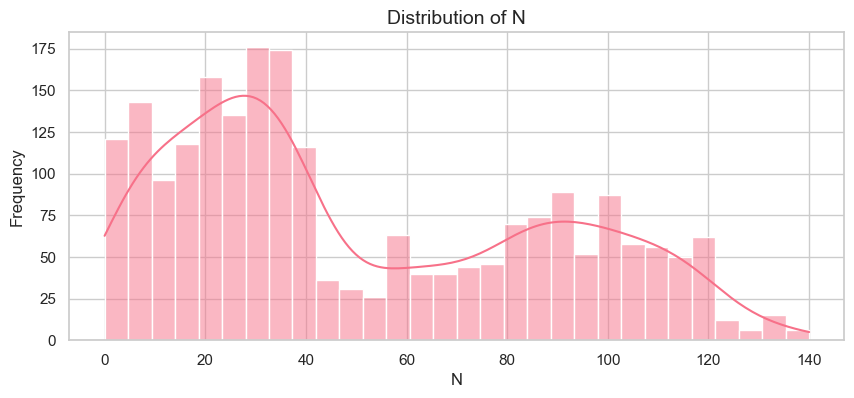

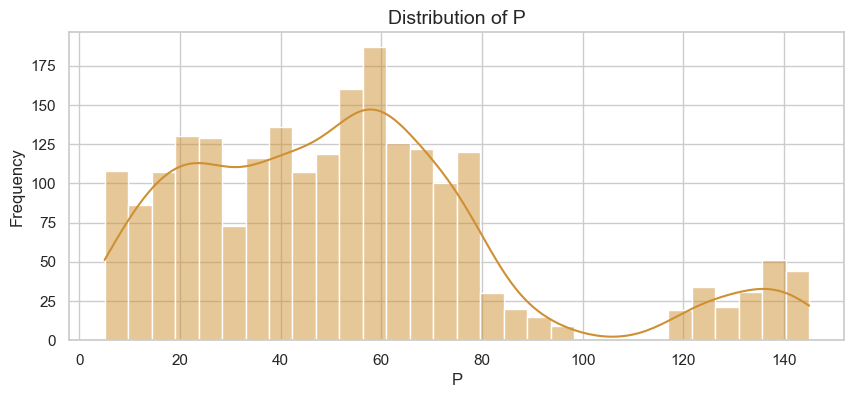

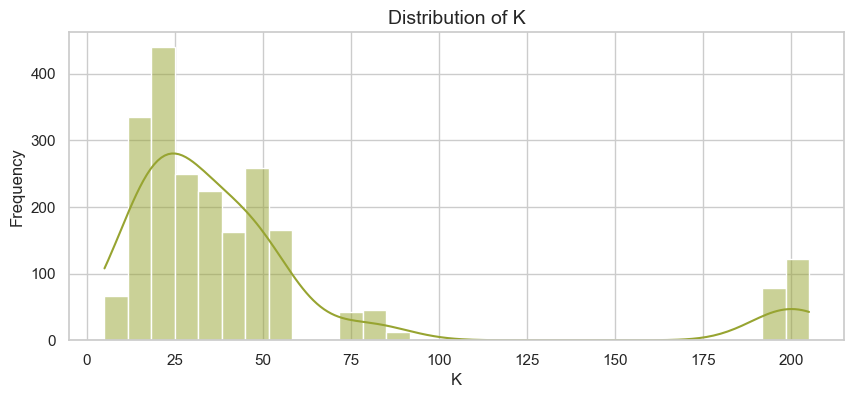

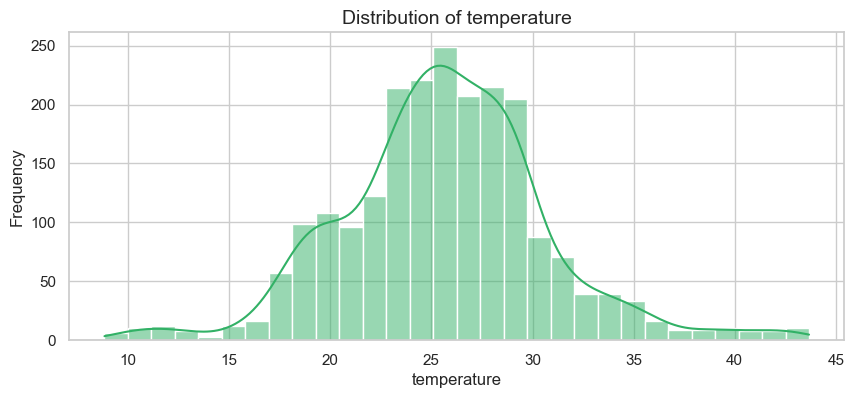

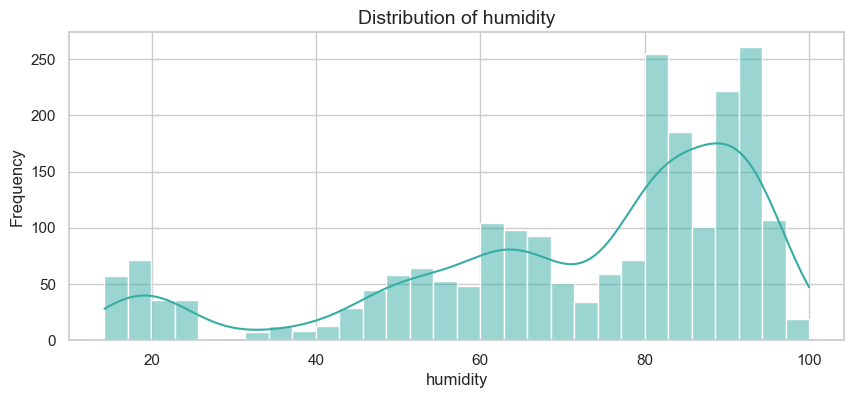

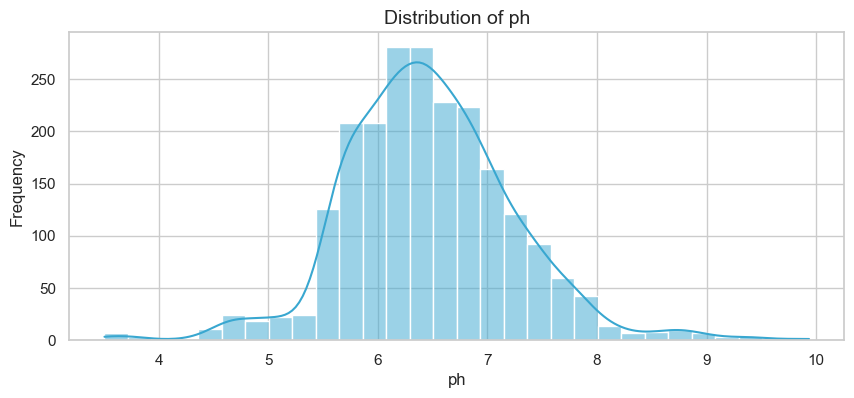

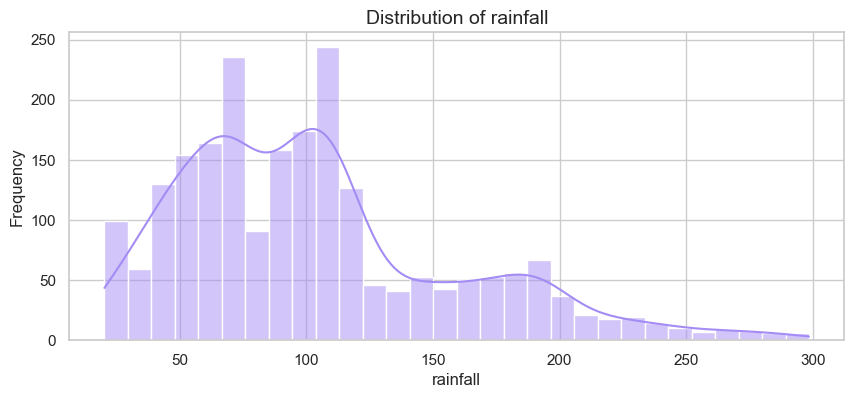

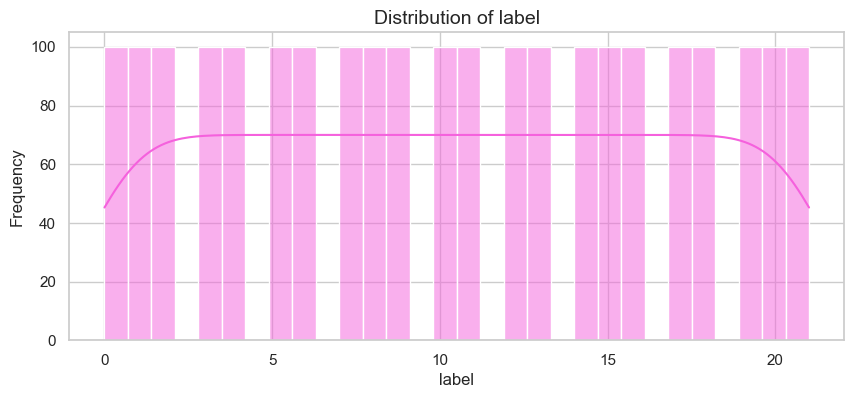

In [15]:
# Set the style for the plots
sns.set(style="whitegrid")

# Define a color palette
color_palette = sns.color_palette("husl", len(df.columns))  # Use HUSL for diverse colors

# Plot each column using a loop for numerical features
for i, column in enumerate(df.select_dtypes(include=['number']).columns):
    plt.figure(figsize=(10, 4))
    sns.histplot(df[column], kde=True, bins=30, color=color_palette[i])
    plt.title(f'Distribution of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.show()


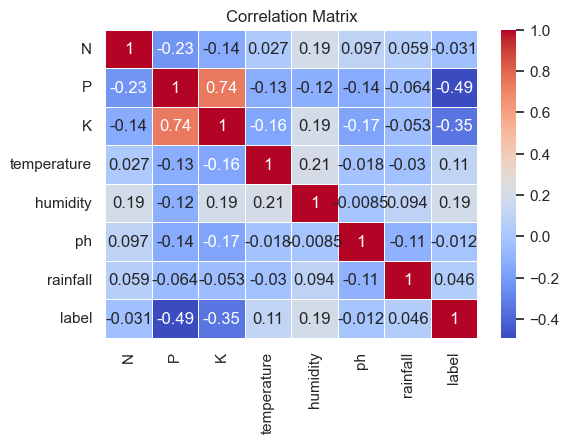

In [16]:
# Plotting the correlation matrix
plt.figure(figsize=(6, 4))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# Independent and Dependent Variables

In [17]:
# Splitting the features (X) and target (y)
X = df.drop('label', axis=1)
y = df['label']   #dependent Variable

# Splitting the dataset into the Training set and Test set

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, test_size=0.3, random_state=42)

# ****Model Training & Evaluation****

# ***DecisionTreeClassifier***

In [19]:
# Train Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluation
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

Decision Tree Accuracy: 0.9787878787878788
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       0.94      1.00      0.97        30
           2       0.97      0.97      0.97        30
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        30
           5       1.00      1.00      1.00        30
           6       1.00      0.97      0.98        30
           7       1.00      1.00      1.00        30
           8       0.93      0.87      0.90        30
           9       1.00      1.00      1.00        30
          10       0.94      0.97      0.95        30
          11       0.94      1.00      0.97        30
          12       1.00      1.00      1.00        30
          13       0.96      0.90      0.93        30
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00        30
          16  

# Random Forest 

In [20]:
# Train Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 0.9939393939393939
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        30
           2       1.00      0.97      0.98        30
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        30
           5       1.00      1.00      1.00        30
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        30
           8       0.94      1.00      0.97        30
           9       1.00      1.00      1.00        30
          10       1.00      0.97      0.98        30
          11       0.97      1.00      0.98        30
          12       1.00      1.00      1.00        30
          13       0.97      1.00      0.98        30
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00        30
          16  

In [22]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = 'RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(rf_model, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

# Support Vector Machine (SVM)

In [23]:
# Train Random Forest Classifier
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

Random Forest Accuracy: 0.9787878787878788
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        30
           2       0.94      1.00      0.97        30
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        30
           5       1.00      1.00      1.00        30
           6       0.91      1.00      0.95        30
           7       1.00      1.00      1.00        30
           8       0.79      1.00      0.88        30
           9       0.97      1.00      0.98        30
          10       1.00      1.00      1.00        30
          11       1.00      0.90      0.95        30
          12       1.00      1.00      1.00        30
          13       1.00      0.97      0.98        30
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00        30
          16  

# AdaBoost 



In [24]:
# Train AdaBoost Classifier
ab_model = AdaBoostClassifier(random_state=42)
ab_model.fit(X_train, y_train)

# Predictions
y_pred_ab = ab_model.predict(X_test)

# Evaluation
print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_ab))
print("Classification Report:\n", classification_report(y_test, y_pred_ab))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ab))

AdaBoost Accuracy: 0.17727272727272728
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.00      0.00      0.00        30
           2       0.00      0.00      0.00        30
           3       1.00      0.07      0.12        30
           4       0.00      0.00      0.00        30
           5       0.23      0.97      0.37        30
           6       0.12      1.00      0.22        30
           7       0.00      0.00      0.00        30
           8       0.00      0.00      0.00        30
           9       1.00      1.00      1.00        30
          10       0.00      0.00      0.00        30
          11       0.00      0.00      0.00        30
          12       0.00      0.00      0.00        30
          13       0.00      0.00      0.00        30
          14       0.00      0.00      0.00        30
          15       0.00      0.00      0.00        30
          16      

# XGBoost 

In [25]:
# Train XGBoost Classifier
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

XGBoost Accuracy: 0.9893939393939394
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        30
           1       0.97      1.00      0.98        30
           2       0.97      1.00      0.98        30
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        30
           5       0.97      1.00      0.98        30
           6       1.00      1.00      1.00        30
           7       1.00      0.93      0.97        30
           8       0.97      0.97      0.97        30
           9       1.00      1.00      1.00        30
          10       1.00      0.97      0.98        30
          11       1.00      1.00      1.00        30
          12       1.00      1.00      1.00        30
          13       0.97      1.00      0.98        30
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00        30
          16       1

# Accuracy Comparison

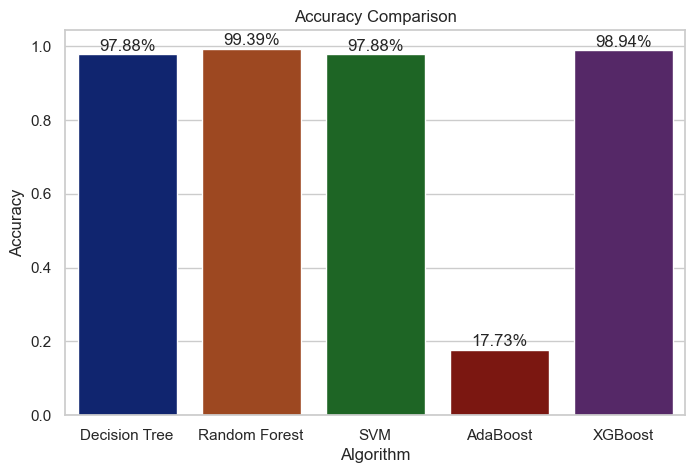

In [26]:
# Define model names and their accuracy scores
model_names = ["Decision Tree", "Random Forest", "SVM", "AdaBoost", "XGBoost"]
accuracies = [
    accuracy_score(y_test, y_pred_dt),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_svm),
    accuracy_score(y_test, y_pred_ab),
    accuracy_score(y_test, y_pred_xgb)
]

# Plot the accuracies
plt.figure(figsize=[8, 5], dpi=100)
plt.title('Accuracy Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
sns.barplot(x=model_names, y=accuracies, hue=model_names, palette='dark')

# Add accuracy percentages above each bar
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.01, f'{accuracy:.2%}', ha='center')

plt.show()


# Making a Prediction with LIME explanation using RF

In [27]:
# Define the crop dictionary
crop_dict = {
    0: 'Apple', 1: 'Banana', 2: 'Blackgram', 3: 'Chickpea', 4: 'Coconut',
    5: 'Coffee', 6: 'Cotton', 7: 'Grapes', 8: 'Jute', 9: 'Kidneybeans',
    10: 'Lentil', 11: 'Maize', 12: 'Mango', 13: 'Mothbeans', 14: 'Moongbeans',
    15: 'Muskmelon', 16: 'Orange', 17: 'Papaya', 18: 'Pigeonpeas', 19: 'Pomegranate',
    20: 'Rice', 21: 'Watermelon'
}

# Prepare input features for prediction using XGBoost
def predict_with_rf(N, P, K, temperature, humidity, ph, rainfall):
    # Prepare input features as a numpy array
    input_features = np.array([[N, P, K, temperature, humidity, ph, rainfall]])

    # Make the prediction
    prediction = rf_model.predict(input_features)

    # Map the result to the crop name
    predicted_crop = crop_dict[prediction[0]]
    print("Recommend Crop:", predicted_crop)

    return predicted_crop

# LIME Explanation
def explain_with_lime(input_features):
    explainer = LimeTabularExplainer(X_train.values, training_labels=y_train, mode="classification", 
                                     feature_names=X_train.columns, class_names=np.unique(y_train), discretize_continuous=True)

    exp = explainer.explain_instance(input_features[0], rf_model.predict_proba, num_features=5)
    exp.show_in_notebook(show_table=True)  # Show the explanation table
    exp.as_pyplot_figure()  # Display explanation as a plot

Recommend Crop: Rice


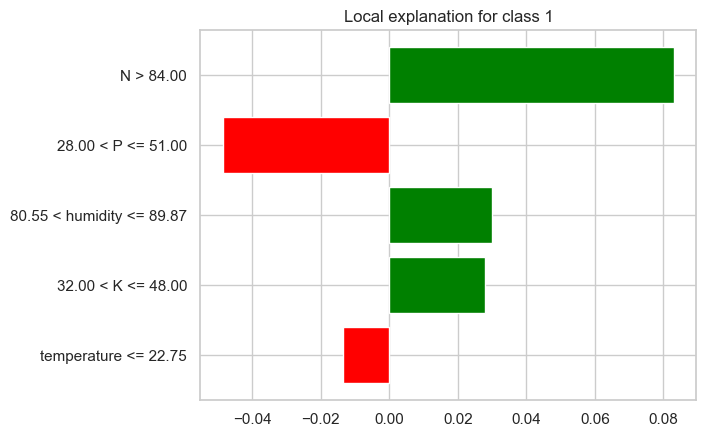

In [28]:
# Example usage with input values for N, P, K, temperature, humidity, ph, rainfall
N, P, K, temperature, humidity, ph, rainfall = 90, 42, 43, 20.87974371, 82.00274423, 6.502985292, 202.9355362  

# Make the prediction
predicted_crop = predict_with_rf(N, P, K, temperature, humidity, ph, rainfall)

# Prepare input for LIME explanation
input_features = np.array([[N, P, K, temperature, humidity, ph, rainfall]])

# Explain the prediction with LIME
explain_with_lime(input_features)

Recommend Crop: Chickpea


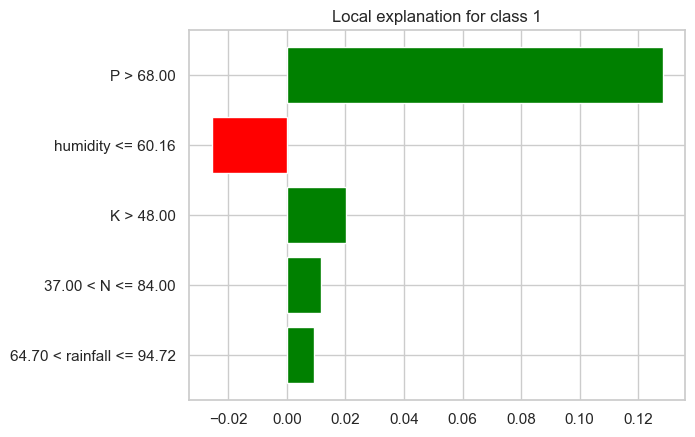

In [29]:
# Example usage with input values for N, P, K, temperature, humidity, ph, rainfall
N, P, K, temperature, humidity, ph, rainfall = 44,74,85,20.18649426,19.63719995,7.150681303,78.26039559  

# Make the prediction
predicted_crop = predict_with_rf(N, P, K, temperature, humidity, ph, rainfall)

# Prepare input for LIME explanation
input_features = np.array([[N, P, K, temperature, humidity, ph, rainfall]])

# Explain the prediction with LIME
explain_with_lime(input_features)